# 权重初始化

假设有10层神经网络，每层有500个神经元，采用tanh非线性激活函数。

对比不同初始化方式对结果的影响。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# assume some unit gaussian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10
act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}

In [2]:
# 定义输出每层结果的函数
def each_layer_result(std, nonlinearities):
    Hs = {}
    for i in range(len(hidden_layer_sizes)):
        X = D if i == 0 else Hs[i-1]  # input at this layer
        fan_in = X.shape[1]
        fan_out = hidden_layer_sizes[i]
        W = np.random.randn(fan_in, fan_out) * std  # layer initialization  (高斯分布：均值为0，标准差为0.01)

        H = np.dot(X, W)  # matrix multiply  矩阵点乘
        H = act[nonlinearities[i]](H)  # nonlinearity  激活函数
        Hs[i] = H  # cache result on this layer  保存本层结果
    return Hs

In [3]:
# 定义画图函数
def print_and_plot_result(Hs):
    # look at distributions at each layer  打印每层输出数据的均值和标准差
    print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
    layer_means = [np.mean(H) for i,H in Hs.items()]
    layer_stds = [np.std(H) for i,H in Hs.items()]
    for i in range(len(Hs)):
        print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
          
    # plot the means and standard deviations  画出每层输出数据的均值和标准差
    plt.figure()
    plt.subplot(121)
    plt.plot(Hs.keys(), layer_means, 'ob-')
    plt.title('layer mean')
    plt.subplot(122)
    plt.plot(Hs.keys(), layer_stds, 'or-')
    plt.title('layer std')

    # plot the raw distributions  画出每层激活数据的原始的直方图
    plt.figure(figsize=(20, 4))
    for i,H in Hs.items():
        plt.subplot(1, len(Hs), i+1)
        plt.hist(H.ravel(), 30, range=(-1,1))

## 小的随机数初始化

(高斯分布：均值为0，标准差为0.01)

input layer had mean -0.004450 and std 0.999697
hidden layer 1 had mean 0.000163 and std 0.213107
hidden layer 2 had mean 0.000062 and std 0.047421
hidden layer 3 had mean -0.000011 and std 0.010620
hidden layer 4 had mean -0.000002 and std 0.002369
hidden layer 5 had mean 0.000000 and std 0.000529
hidden layer 6 had mean 0.000000 and std 0.000118
hidden layer 7 had mean -0.000000 and std 0.000027
hidden layer 8 had mean -0.000000 and std 0.000006
hidden layer 9 had mean 0.000000 and std 0.000001
hidden layer 10 had mean 0.000000 and std 0.000000


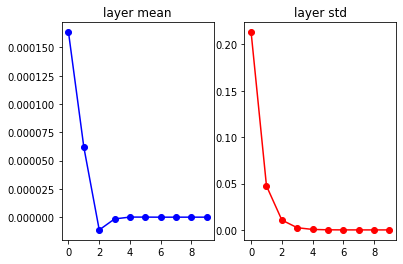

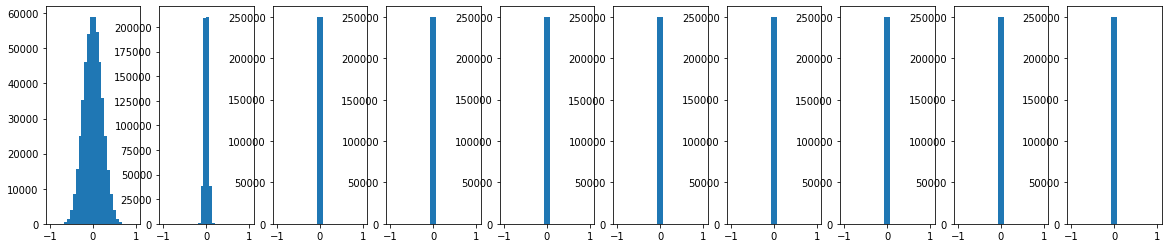

In [4]:
nonlinearities = ['tanh']*len(hidden_layer_sizes)
std = 0.01

print_and_plot_result(each_layer_result(std,nonlinearities))

## 大的权重初始化

input layer had mean -0.004450 and std 0.999697
hidden layer 1 had mean 0.000616 and std 0.981991
hidden layer 2 had mean -0.000781 and std 0.981622
hidden layer 3 had mean -0.001261 and std 0.981648
hidden layer 4 had mean -0.000398 and std 0.981834
hidden layer 5 had mean -0.003444 and std 0.981626
hidden layer 6 had mean 0.002024 and std 0.981621
hidden layer 7 had mean -0.001873 and std 0.981720
hidden layer 8 had mean 0.001060 and std 0.981720
hidden layer 9 had mean -0.001293 and std 0.981550
hidden layer 10 had mean -0.002506 and std 0.981872


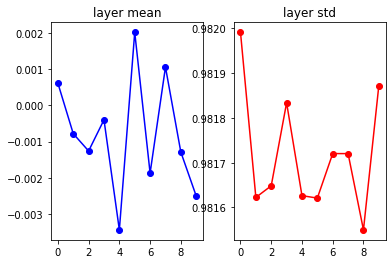

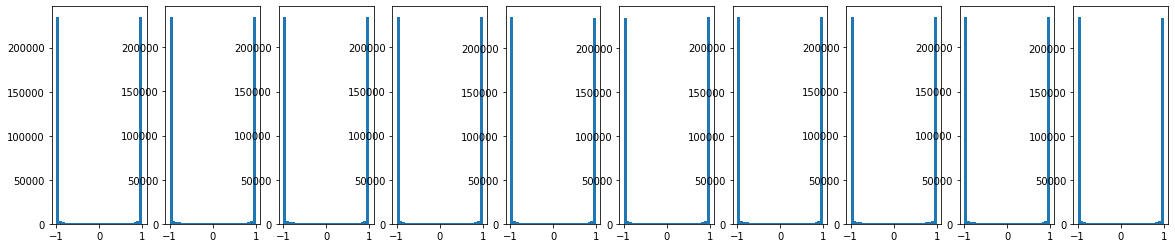

In [5]:
nonlinearities = ['tanh']*len(hidden_layer_sizes)
std = 1

print_and_plot_result(each_layer_result(std,nonlinearities))

## Xavier initialization

input layer had mean -0.004450 and std 0.999697
hidden layer 1 had mean -0.000708 and std 0.628125
hidden layer 2 had mean -0.000516 and std 0.486516
hidden layer 3 had mean 0.000201 and std 0.408365
hidden layer 4 had mean -0.000711 and std 0.358086
hidden layer 5 had mean 0.000754 and std 0.321194
hidden layer 6 had mean -0.000262 and std 0.293984
hidden layer 7 had mean -0.000195 and std 0.272187
hidden layer 8 had mean 0.000189 and std 0.254893
hidden layer 9 had mean 0.000064 and std 0.242106
hidden layer 10 had mean 0.000079 and std 0.228303


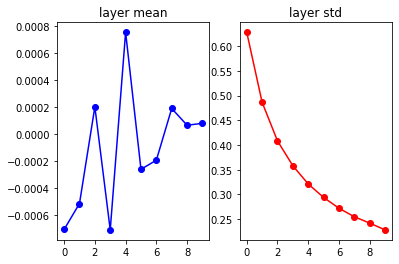

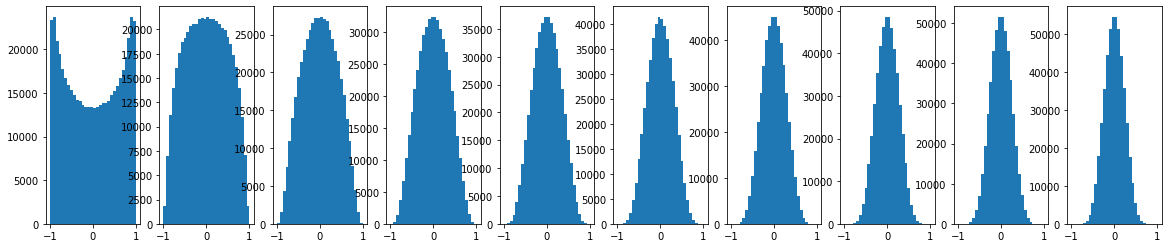

In [6]:
nonlinearities = ['tanh']*len(hidden_layer_sizes)
# W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
std = 1/np.sqrt(500)  # 对本假设，fan_in全是500

print_and_plot_result(each_layer_result(std,nonlinearities))

input layer had mean -0.004450 and std 0.999697
hidden layer 1 had mean 0.399545 and std 0.583620
hidden layer 2 had mean 0.287995 and std 0.417853
hidden layer 3 had mean 0.203471 and std 0.293588
hidden layer 4 had mean 0.139820 and std 0.208028
hidden layer 5 had mean 0.086695 and std 0.133457
hidden layer 6 had mean 0.067072 and std 0.097255
hidden layer 7 had mean 0.044842 and std 0.069004
hidden layer 8 had mean 0.031458 and std 0.048042
hidden layer 9 had mean 0.024430 and std 0.034737
hidden layer 10 had mean 0.018979 and std 0.026605


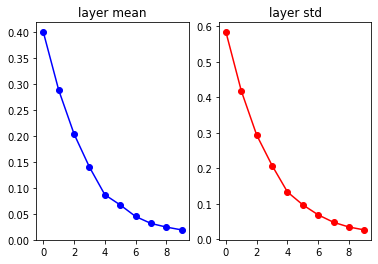

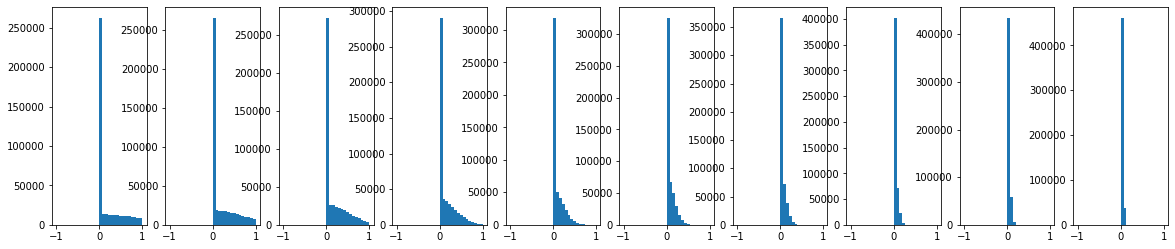

In [7]:
nonlinearities = ['relu']*len(hidden_layer_sizes)
# W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
std = 1/np.sqrt(500)  # 对本假设，fan_in全是500

print_and_plot_result(each_layer_result(std,nonlinearities))

***使用ReLU不使用Tanh时，Xavier初始化不再适用***

## He et al./MSRA, 2015 初始化

input layer had mean -0.004450 and std 0.999697
hidden layer 1 had mean -0.000820 and std 0.720543
hidden layer 2 had mean 0.000153 and std 0.633501
hidden layer 3 had mean 0.000796 and std 0.595826
hidden layer 4 had mean 0.001853 and std 0.577508
hidden layer 5 had mean 0.000410 and std 0.568363
hidden layer 6 had mean 0.000192 and std 0.562732
hidden layer 7 had mean 0.000065 and std 0.558645
hidden layer 8 had mean -0.000579 and std 0.557313
hidden layer 9 had mean -0.000708 and std 0.557277
hidden layer 10 had mean -0.000246 and std 0.556668


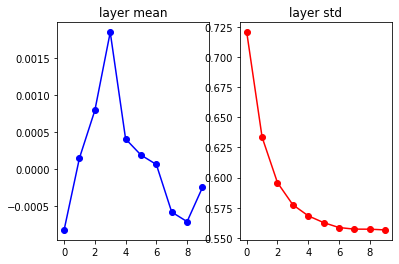

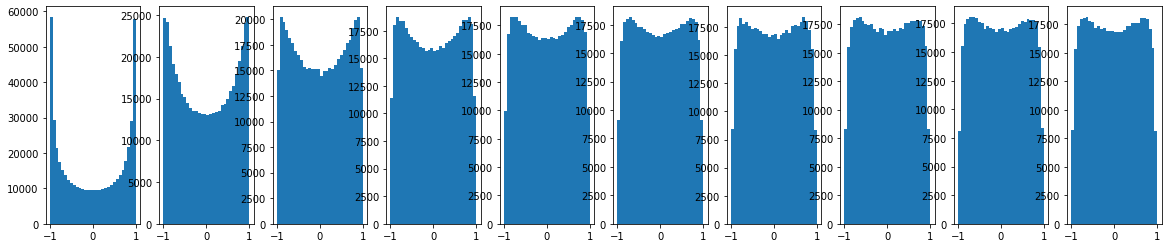

In [8]:
nonlinearities = ['tanh']*len(hidden_layer_sizes)
# W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)
std = 1/np.sqrt(500/2)  # 对本假设，fan_in全是500

print_and_plot_result(each_layer_result(std,nonlinearities))

input layer had mean -0.004450 and std 0.999697
hidden layer 1 had mean 0.564976 and std 0.828098
hidden layer 2 had mean 0.573064 and std 0.833353
hidden layer 3 had mean 0.573592 and std 0.833562
hidden layer 4 had mean 0.551749 and std 0.829932
hidden layer 5 had mean 0.601003 and std 0.847377
hidden layer 6 had mean 0.565592 and std 0.850641
hidden layer 7 had mean 0.592556 and std 0.890411
hidden layer 8 had mean 0.597993 and std 0.860958
hidden layer 9 had mean 0.553725 and std 0.868310
hidden layer 10 had mean 0.576404 and std 0.804692


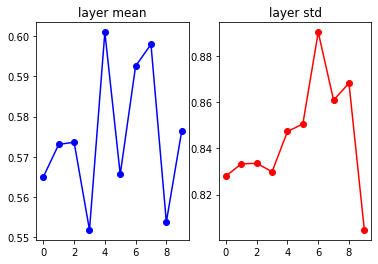

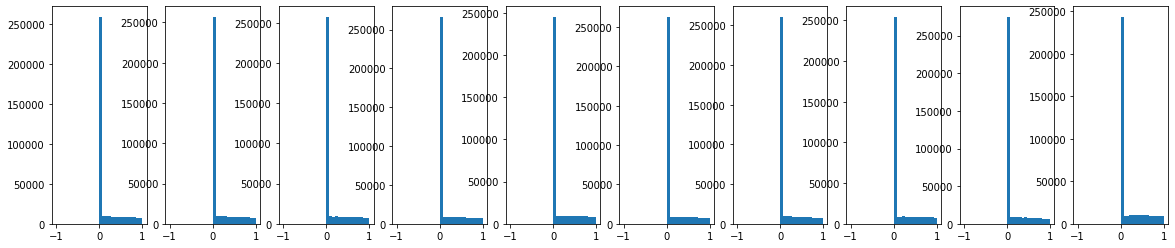

In [9]:
nonlinearities = ['relu']*len(hidden_layer_sizes)
# W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)
std = 1/np.sqrt(500/2)  # 对本假设，fan_in全是500

print_and_plot_result(each_layer_result(std,nonlinearities))

***使用ReLU时，当前最好的初始化方式***